In [14]:
# Esto es por que el modulo tf_regressor esta en otra carpeta
import sys
import os
ruta_tf_regressor = os.path.join(os.path.abspath('..'), 'Notebooks')
if ruta_tf_regressor not in sys.path:
    sys.path.append(ruta_tf_regressor)
from tf_regressor import Regressor , train_test_split_scale_center

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

## **EJERCICIO 1.** En este ejercicio utilizaremos el dataset `casos_coronavirus`.
- a) Cargar el dataset y añadirle la columna dias_transcurridos con el indice de cada observación

In [3]:
coronavirus = pd.read_csv("../_src/Datasets/casos_coronavirus.csv")
print(coronavirus.info())
coronavirus.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   fecha               96 non-null     object
 1   confirmados_Nuevos  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB
None


,fecha,confirmados_Nuevos
0,3-3-2020,1
1,4-3-2020,0
2,5-3-2020,1
3,6-3-2020,6
4,7-3-2020,0


In [4]:
coronavirus["fecha"] = pd.to_datetime(coronavirus["fecha"],dayfirst=True)
coronavirus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fecha               96 non-null     datetime64[ns]
 1   confirmados_Nuevos  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
# Ejercicio 1. a)
coronavirus["dias_transcurridos"] = (coronavirus["fecha"] - coronavirus["fecha"].min()).dt.days
coronavirus.head()

,fecha,confirmados_Nuevos,dias_transcurridos
0,2020-03-03,1,0
1,2020-03-04,0,1
2,2020-03-05,1,2
3,2020-03-06,6,3
4,2020-03-07,0,4


- (b) Plotear dias_transcurridos vs. confirmados_Nuevos

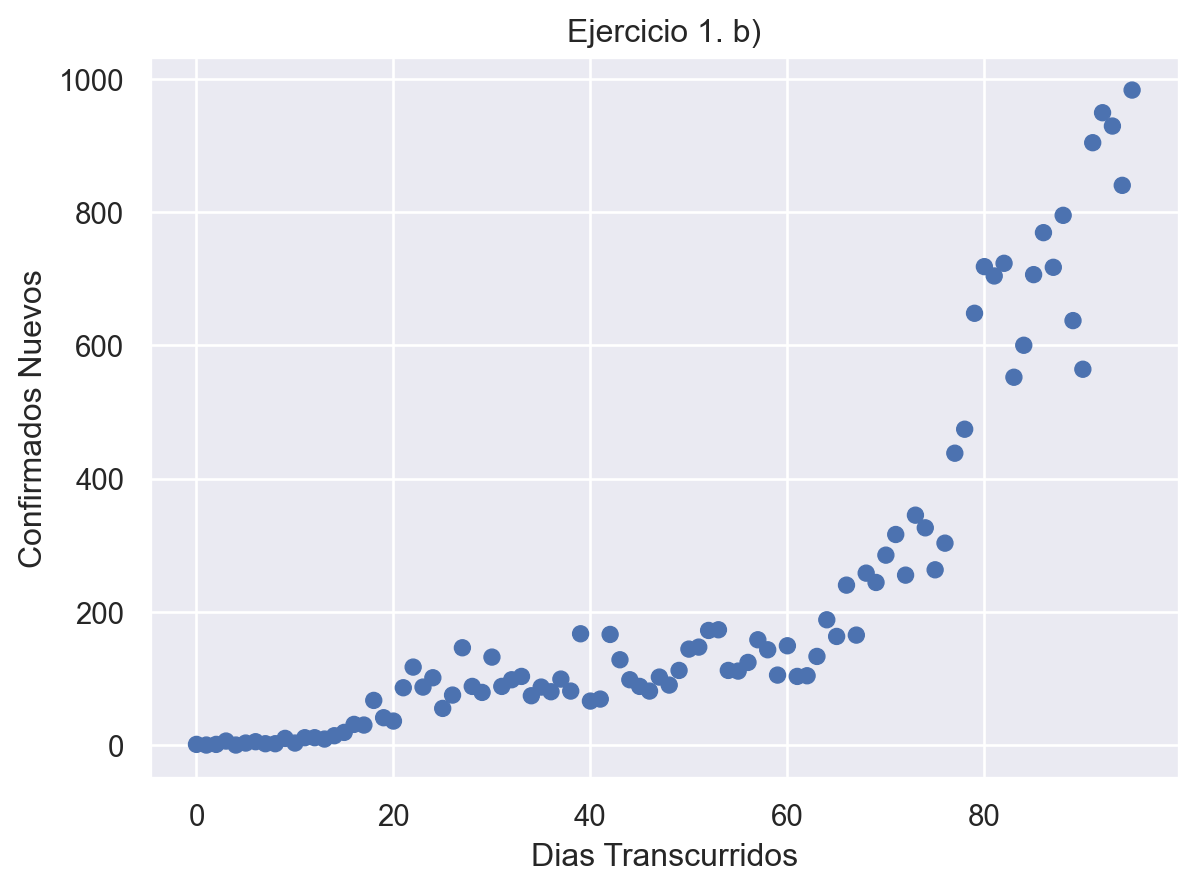

In [6]:
(
    so.Plot(coronavirus,x="dias_transcurridos",y="confirmados_Nuevos")
    .add(so.Dot())
    .label(x="Dias Transcurridos",y = "Confirmados Nuevos", title="Ejercicio 1. b)")
)

### c) Queremos armar un modelo de regresión que permita explicar la evolución de casos de coronavirus $(Y)$ en función de los días transcurridos $(X)$. Para esto se proponen los siguientes modelos:
- **i**. $Y=b+w_0 X+w_1 X^2$

- **ii**. $Y=b+w_0 X^{w_1}$

- **iii.** $Y=b+w e^X$

- **iv.** $Y=b+w_0 e^{w_1 X}$

Dividir el conjunto de datos en entrenamiento y testeo y decidir qué modelo resulta más adecuado. Utilizar scikit-learn para los modelos lineales y Regressor para los no lineales. En este último caso, se pueden usar de guía los modelos lineales para establecer valores iniciales de los pesos. Probar con distintas cantidades de épocas y valores iniciales para los pesos y el bias.

In [66]:
# Dividimos los datos en entrenamiento y testeo
X = coronavirus["dias_transcurridos"]
y = coronavirus["confirmados_Nuevos"]

X_train, X_test, y_train, y_test = train_test_split_scale_center(X,y,
                                                                 #transform_y=True,  # Normalizamos y también 
                                                                 center=False,      # No centramos los datos
                                                                 test_size=0.2,     # 20% de los datos para testeo
                                                                 random_state=11)   # Semilla para datos de testeo

### Modelo i)

In [63]:
# Modelo i
f_i = lambda x,w,b: b + w[0]*x + w[1]*(x**2)

modelo_i = Regressor()

modelo_i.add_f(f_i, 
               w0=np.array([12.106336,756.5011]),
               b0=-29.140205,
               random_state=21,
               opt="gd" # Especificamos que usamos descenso por gradiente
                     )
# Entrenamos el modelo con los conjuntos de entrenamiento
modelo_i.fit_(X_train, y_train,        # Conjuntos de entrenamiento 
           epochs=200, # Cantidad de epocas
           verbose = 0, # No mostrar progreso
           validation_split=0.2,    # 20% de datos para validacion
           learning_rate=0.05)      # Learning rate inicial  


In [65]:
# Imprimimos los pesos y el bias resultantes del entrenamiento
print(modelo_i.weights_)
print(modelo_i.bias_)

# Evaluamos el MSE en el conjunto de testeo
modelo_i.evaluate(X_test.to_numpy(), y_test.to_numpy(),        # A TensorFlow no le gustan los DataFrame de pandas 
               return_dict=True,                            # Devuelve un diccionario (por si usamos mas de una métrica)
               verbose=0,                                   # No imprima en pantalla el procedimiento de evaluación
               batch_size=len(y_test))


[-26.466824 798.7132  ]
-24.345425


{'loss': 12128.634765625}

### Modelo ii

In [79]:
f_ii = lambda x,w,b: b + w[0]*(x**w[1])

modelo_ii = Regressor()

modelo_ii.add_f(f_ii,
               w0=np.array([2,2]),
               b0=0,
               random_state=21,
            #    opt="gd" # Especificamos que usamos descenso por gradiente
                     )
# Entrenamos el modelo con los conjuntos de entrenamiento
modelo_ii.fit_(X_train, y_train,        # Conjuntos de entrenamiento 
           epochs=200, # Cantidad de epocas
           verbose = 0, # No mostrar progreso
           validation_split=0.2,    # 20% de datos para validacion
           learning_rate=0.05)      # Learning rate inicial  


In [80]:
# Imprimimos los pesos y el bias resultantes del entrenamiento
print(modelo_ii.weights_)
print(modelo_ii.bias_)

# Evaluamos el MSE en el conjunto de testeo
modelo_ii.evaluate(X_test.to_numpy(), y_test.to_numpy(),        # A TensorFlow no le gustan los DataFrame de pandas 
               return_dict=True,                            # Devuelve un diccionario (por si usamos mas de una métrica)
               verbose=0,                                   # No imprima en pantalla el procedimiento de evaluación
               batch_size=len(y_test))

[nan nan]
nan


{'loss': nan}